In [1]:
#load packages
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Loading

In [3]:
#load image train data
df = pd.read_csv("/content/drive/MyDrive/mnist.csv")
#select data points from dataframe of any single label(0-9) of your choice 
features_chosen = []
label_chosen = []
for index,row in df.iterrows():
  #choosing the label 0
  if row[-1] == 0:
    features_chosen.append(row[:-1])
    label_chosen.append(0)
# split the target column ('label') and features ([pixel_0 ... pixel_783])
features = df.drop(df.columns[-1], axis=1)
label = df[df.columns[-1]]




## Data Vizualization

In [4]:
#function to convert the row pixel to image (28,28,1)
def row2img(df):
    img_arr = []
    num_row = df.shape[0]
    for i in tqdm(range(num_row)):
        img_arr.append(df.iloc[i].to_numpy()[:784].reshape((28,28,1)))
    return np.array(img_arr)

# function to plot some samples
def plot(img,label,numplot = 10):
    label = label.to_numpy()
    plt.figure(figsize=(8,6),dpi=100)
    for i in range(numplot):
        plt.subplot(2,numplot,i+1)
        plt.axis('off')
        plt.title(label[i])
        plt.imshow(img[i][:,:,0])

100%|██████████| 5923/5923 [00:00<00:00, 14302.03it/s]
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


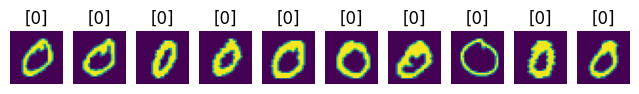

In [5]:
#for vizualization first convert the row pixel to image shape 
images = row2img(pd.DataFrame(features_chosen))
#plot the image
plot(images,pd.DataFrame(label_chosen))


## PCA Implementation

In [6]:
X = np.array(features_chosen)
# compute mean and demean (subtracting mean from data points) the data
mean = np.mean(X,axis=0)
X_centered = X - mean
## hint: you can use StandardScaler(with_std=False) Package or np.mean(X,axis=0)

In [7]:
# compute covariance matrix
S = np.cov(X_centered,rowvar=False)
## hint: you can use np.conv(X,rowvar=False)

In [8]:
# compute eigen vectors and eigen values
eigen_values, eigen_vectors = np.linalg.eig(S)
## hint: you can use np.linalg.eig(matrix)

In [9]:
# sort the eigen values in descending order and also arrange eigen vector accordingly
index = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[index]
eigen_vectors = eigen_vectors[:,index]
#As vectors are present column wise take transpose to convert it to row wise
eigen_vectors = eigen_vectors.transpose()
## hint: you can use np.argsort(array) for sorting by index or conventional sorting np.sort(array)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


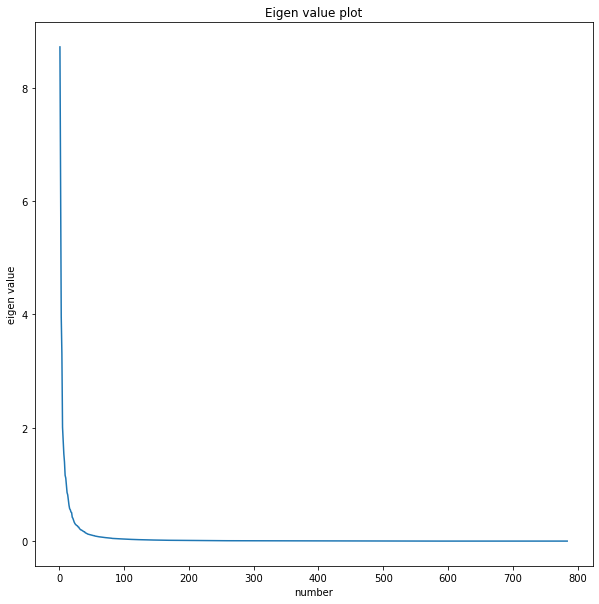

In [61]:
# plot the eigen values
t = np.array([i for i in range (1,1+len(eigen_values))])
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(t,eigen_values)
plt.ylabel("eigen value")
plt.xlabel("number")
plt.title('Eigen value plot')
plt.show()

In [30]:
#project data into lower dimensional space from 1 dimension to 784 dimension and keep track of reconstruction error
losses = []
dimensions = []
for dimension in range(1,len(eigen_values)+1):
  principle_components = eigen_vectors[:dimension].transpose()
  X_reconstucted = np.dot(np.dot(X_centered,principle_components),principle_components.transpose())+mean
  loss = np.linalg.norm(X-X_reconstucted,None)
  losses.append(loss)
  dimensions.append(dimension)
    

## INFO - This section of code might take around 10-12 min to execute.
## hint:
### loop through 1 dim to 784 dim
  #### get required number of  eigen vectors in the same order of eigen values arranged in descending order
  ###  project the data using np.dot(X,Y) on these eigen vector to obtain principal components
  ###  reconstruct the original component from pca component (first projecting back pca component to eigen vector and adding mean which we have subtracted)
  ### calculate reconstruction loss using np.linalg.norm((orig-modified),None)) and append to a list


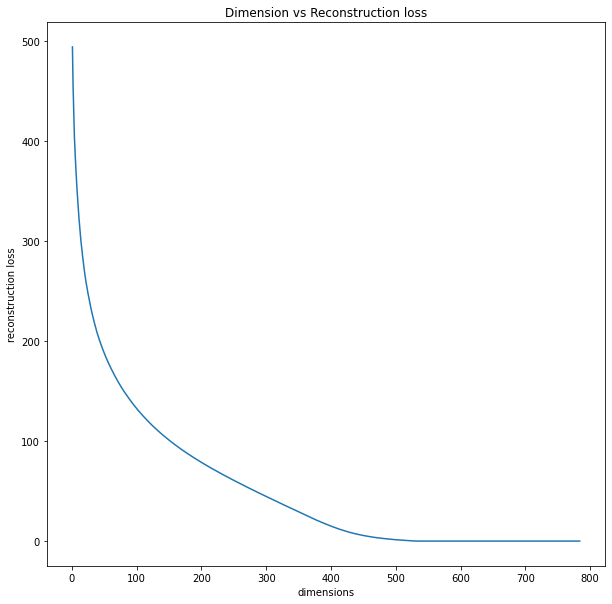

In [62]:
# plot reconstruction error, it should come in elbow shape same as eigen value graph
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(dimensions,losses)
plt.xlabel('dimensions')
plt.ylabel('reconstruction loss')
plt.title('Dimension vs Reconstruction loss')
plt.show()

## PCA with optimal number of components

In [69]:
#Choose optimal number of components based on reconstruction graph
# I choosed the elbow point which is 120 because after it the slope is somewhat constant
num = 120
#Following above procedure extract the optimal number of principal components
principle_components = eigen_vectors[:num].transpose()

100%|██████████| 5923/5923 [00:00<00:00, 594142.08it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
100%|██████████| 5923/5923 [00:00<00:00, 12762.71it/s]


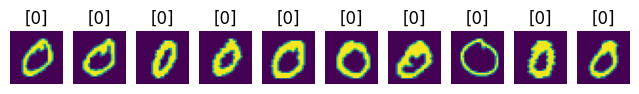

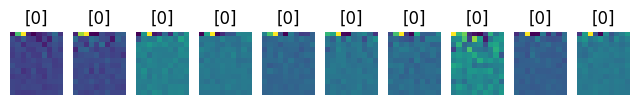

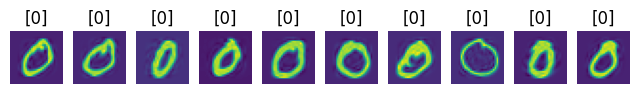

In [71]:
# plot the image using transformed features

# For comparison I plotted the real , transformed and reconstructed

#Real
images = row2img(pd.DataFrame(X))
plot(images,pd.DataFrame(label_chosen))

#Transformed
Z = np.dot(X,principle_components)
img_arr = []
for i in tqdm(range(Z.shape[0])):
    img_arr.append(Z[i].reshape(12,10,1))
img = np.array(img_arr).astype(float)
plot(img,pd.DataFrame(label_chosen),10)

#Reconstructed
X_reconstucted = np.dot(np.dot(X_centered,principle_components),principle_components.transpose())+mean
images = row2img(pd.DataFrame(X_reconstucted.astype(float)))
plot(images,pd.DataFrame(label_chosen))

## Write your observation based on images you have obtained after transformation in comparison to original image.

In [72]:
"""
Observations:

*After reconstruction the shape of the zeros are almost the same as the original with little difference.
*Cannot see the zero shape in the transformed image , but we can clearly see that in the reconstructed image.
*The color has changed this means the pixel values got changed.
*For images with difference in way of writing the zero for example in the above figure image 1 and 8 (row-wise) we can see the transformed images also look different
 so this means it captured the difference in the features and after transform all don't look the same.

"""

"\nObservations:\n\n*After reconstruction the shape of the zeros are almost the same as the original with little difference.\n*Cannot see the zero shape in the transformed image , but we can clearly see that in the reconstructed image.\n*The color has changed this means the pixel values got changed.\n*For images with difference in way of writing the zero for example in the above figure image 1 and 8 (row-wise) we can see the transformed images also look different\n so this means it captured the difference in the features and after transform all don't look the same.\n\n"